In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Installation

In [2]:
! pip install unidecode
! pip install autocorrect 
! pip install simpletransformers
! pip install transformers

     |████████████████████████████████| 235 kB 11.7 MB/s 
     |████████████████████████████████| 622 kB 13.1 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=ec9d14a1589a6dac0fc972e75afd17376fa6a1baa024ebba75073c3d4b6a463f
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect
     |████████████████████████████████| 249 kB 12.5 MB/s 
     |████████████████████████████████| 4.0 MB 47.2 MB/s 
     |████████████████████████████████| 6.6 MB 45.7 MB/s 
     |████████████████████████████████| 10.1 MB 41.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.9 MB/s 
     |████████████████████████████████| 325 kB 54.2 MB/s 
     |████████████████████████████████| 1.8 MB 48.0 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 895 kB 44.3 MB/s 
     |████████████████████████████████| 596 kB 26.1 MB/s 
     |


### Importing Libraries

In [3]:
# linear algebra
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn import model_selection
from bs4 import BeautifulSoup
from sklearn.metrics import f1_score
# We can use sklearn algorithms in NLTK
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from tqdm import tqdm
tqdm.pandas()
import spacy
from sklearn import preprocessing

nlp = spacy.load("en_core_web_sm")
stops = spacy.lang.en.stop_words.STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import collections
import seaborn as sns
from nltk.util import ngrams
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import torch

import gc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Reading training & test data

In [4]:
# !7z e /content/drive/MyDrive/ChiSquareX/14-04-22-DI-0001-rf-bert-roberta/Stance_dataset_b4Easter.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/ChiSquareX/14-04-22-DI-0001-rf-bert-roberta/                                                                             1 file, 88820 bytes (87 KiB)

Extracting archive: /content/drive/MyDrive/ChiSquareX/14-04-22-DI-0001-rf-bert-roberta/Stance_dataset_b4Easter.7z
--
Path = /content/drive/MyDrive/ChiSquareX/14-04-22-DI-0001-rf-bert-roberta/Stance_dataset_b4Easter.7z
Type = 7z
Physical Size = 88820
Headers Size = 226
Method = LZMA2:19
Solid = +
Blocks = 1

  0%    Everything is Ok

Folders: 1
Files: 2
Size:       493070
Compressed: 88820


In [5]:
df_train=pd.read_csv('trainset.csv')
df_train

Tweet  \
0     Just laid down the law on abortion in my bioet...   
1     @tooprettyclub Are you OK with #GOP males tell...   
2     If you don't want your kid, put it up for adop...   
3     @RedAlert -there should be a "stigma" to butch...   
4     But isn't that the problem then. Not enough fa...   
...                                                 ...   
1312  #MagicMikeXXL is the most feminist movie I hav...   
1313  #WageEquality means Individuals with Equal Res...   
1314  Do you know the difference between Activism an...   
1315  Girls over 130 shouldn't wear a swim suit #wom...   
1316  It's hard being a woman, constantly annoyed by...   

                        Target   Stance  Sarcasm  \
0     Legalization of Abortion  AGAINST      0.0   
1     Legalization of Abortion    FAVOR      0.0   
2     Legalization of Abortion  AGAINST      0.0   
3     Legalization of Abortion  AGAINST      0.0   
4     Legalization of Abortion     NONE      0.0   
...                        ...      ...      ...   
1312         Feminist Movement  AGAINST      NaN   
1313         Feminist Movement  AGAINST      NaN   
1314         Feminist Movement  AGAINST      NaN   
1315         Feminist Movement  AGAINST      NaN   
1316         Feminist Movement  AGAINST      NaN   

                                        Opinion Towards Sentiment  
0     1.  The tweet explicitly expresses opinion abo...       neg  
1     1.  The tweet explicitly expresses opinion abo...       neg  
2     1.  The tweet explicitly expresses opinion abo...       neg  
3     1.  The tweet explicitly expresses opinion abo...       neg  
4     2. The tweet does NOT expresses opinion about ...       neg  
...                                                 ...       ...  
1312  2. The tweet does NOT expresses opinion about ...       pos  
1313  1.  The tweet explicitly expresses opinion abo...       pos  
1314  2. The tweet does NOT expresses opinion about ...     other  
1315  2. The tweet does NOT expresses opinion about ...       neg  
1316  2. The tweet does NOT expresses opinion about ...       neg  

[1317 rows x 6 columns]

In [6]:
df_test = pd.read_csv('testset.csv')
df_test

Tweet  \
0    Need a ProLife R.E. Agent? - Support a ProLife...   
1    Where is the childcare program @joanburton whi...   
2    I get several requests with petitions to save ...   
3    we must always see others as Christ sees us,we...   
4    PRAYERS FOR BABIES Urgent prayer one in Lexing...   
..                                                 ...   
557  @Maisie_Williams is our hero with her #LikeAGi...   
558  Rather be an "ugly" feminist then be these sad...   
559  iamNovaah: RT ChrzOC: Bitches be running wild....   
560  @angerelle you disagree that people should str...   
561  #Rapeculture is basically a FABLE. It has almo...   

                       Target   Stance  Sarcasm  \
0    Legalization of Abortion  AGAINST        0   
1    Legalization of Abortion  AGAINST        0   
2    Legalization of Abortion  AGAINST        0   
3    Legalization of Abortion  AGAINST        0   
4    Legalization of Abortion  AGAINST        0   
..                        ...      ...      ...   
557         Feminist Movement    FAVOR        0   
558         Feminist Movement    FAVOR        0   
559         Feminist Movement  AGAINST        0   
560         Feminist Movement    FAVOR        0   
561         Feminist Movement  AGAINST        0   

                                       Opinion Towards Sentiment  
0    2. The tweet does NOT expresses opinion about ...       pos  
1    2. The tweet does NOT expresses opinion about ...       neg  
2    2. The tweet does NOT expresses opinion about ...       neg  
3    2. The tweet does NOT expresses opinion about ...       pos  
4    2. The tweet does NOT expresses opinion about ...       pos  
..                                                 ...       ...  
557  1.  The tweet explicitly expresses opinion abo...       pos  
558  1.  The tweet explicitly expresses opinion abo...       neg  
559  1.  The tweet explicitly expresses opinion abo...       neg  
560  2. The tweet does NOT expresses opinion about ...       neg  
561  1.  The tweet explicitly expresses opinion abo...       neg  

[562 rows x 6 columns]

### Defining important funtions

#### Function to plot word cloud 

In [8]:
def plotWorldCloud(df_train,stopwords,maxWords=500):
    comment_words = '' 
    # iterate through the csv file 
    for val in df_train.Tweet: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = maxWords,
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image					 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

#### Text Preprocessing Functions

In [9]:
import unidecode
import re 
from autocorrect import Speller

def remove_newlines_tabs(text):
    """
    This function will remove all the occurrences of newlines, tabs, and combinations like: \\n, \\.
    
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text


def strip_html_tags(text):
    """ 
    This function will remove all the occurrences of html tags from the text.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of html tags.
        
    Example:
    Input : This is a nice place to live. <IMG>
    Output : This is a nice place to live.  
    """
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


# Code for accented characters removal
def accented_characters_removal(text):
    """
    The function will remove accented characters from the 
    text contained within the Dataset.
       
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" with removed accented characters.
        
    Example:
    Input : Málaga, àéêöhello
    Output : Malaga, aeeohello    
        
    """
    text = unidecode.unidecode(text)
    return text

# Code for removing repeated characters and punctuations

def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Finally formatted text with alphabets repeating to 
        two characters & punctuations limited to one repeatition 
        
    Example:
    Input : Realllllllllyyyyy,        Greeeeaaaatttt   !!!!?....;;;;:)
    Output : Reallyy, Greeaatt !?.;:)
    
    """
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}
# The code for expanding contraction words
def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):
    """expand shortened words to the actual form.
       e.g. don't to do not
    
       arguments:
            input_text: "text" of type "String".
         
       return:
            value: Text with expanded form of shorthened words.
        
       Example: 
       Input : ain't, aren't, can't, cause, can't've
       Output :  is not, are not, cannot, because, cannot have 
    
     """
    # Tokenizing text into tokens.
    list_Of_tokens = text.split(' ')

    # Check whether Word is in lidt_Of_tokens or not.
    for Word in list_Of_tokens: 
        # Check whether found word is in dictionary "Contraction Map" or not as a key. 
         if Word in CONTRACTION_MAP: 
                # If Word is present in both dictionary & list_Of_tokens, replace that word with the key value.
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
                
    # Converting list of tokens to String.
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    return String_Of_tokens 



# The code for spelling corrections
def spelling_correction(text):
    ''' 
    This function will correct spellings.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text after corrected spellings.
        
    Example: 
    Input : This is Oberois from Dlhi who came heree to studdy.
    Output : This is Oberoi from Delhi who came here to study.
      
    
    '''
    # Check for spellings in English language
    spell = Speller(lang='en')
    Corrected_text = spell(text)
    return Corrected_text


## Function to preprocess text by regex and some special symbols

def preprocess_text(text_messages):

  
  processed = text_messages.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                  'emailaddress')

  # Replace URLs with 'webaddress'
  processed = processed.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                    'webaddress')

  # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
  processed = processed.replace(r'£|\$', 'moneysymb')
      
  # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
  processed = processed.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                    'phonenumbr')
      
  # Replace numbers with 'numbr'
  processed = processed.replace(r'\d+(\.\d+)?', 'numbr')

  processed = processed.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
  processed = processed.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
  processed = processed.replace(r'^\s+|\s+?$', '')

# change words to lower case - Hello, HELLO, hello are all the same word
  processed = processed.lower()

 
  return processed



# Function to lemmatize the data using spacy, lowering text and removing stop words
def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)

# Writing main function to merge all the preprocessing steps.
def text_preprocessing(text, accented_chars=True, contractions=True, newlines_tabs=True, repeatition=True, 
                       mis_spell=True, remove_html=True, preprocess = True, lemma = True):
    """
    This function will preprocess input text and return
    the clean text.
    """
        
    if newlines_tabs == True: #remove newlines & tabs.
        Data = remove_newlines_tabs(text)

    if remove_html == True: #remove html tags
        Data = strip_html_tags(Data)

    if accented_chars == True: #remove accented characters
        Data = accented_characters_removal(Data)

    if repeatition == True: #Reduce repeatitions   
        Data = reducing_incorrect_character_repeatation(Data)

    if contractions == True: #expand contractions
        Data = expand_contractions(Data)

    spell = Speller(lang='en')
    
    if mis_spell == True: #Check for mis-spelled words & correct them.
        Data = spelling_correction(Data)

    if preprocess == True:
        Data = preprocess_text(Data)

    if lemma == True:
        Data = normalize(Data, lowercase=True, remove_stopwords=False)
          
    return Data


#### Checking the dependent variable

From the pie-chart and bar plot, it can be seen that the data is unbalanced with higher number of samples from the against stance.

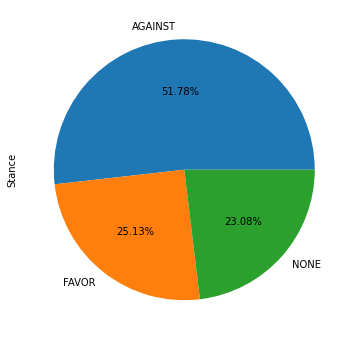

In [10]:
#Checking the class balance
plt.figure(figsize=(8, 6))
df_train['Stance'].value_counts().plot(kind='pie', autopct='%1.2f%%')

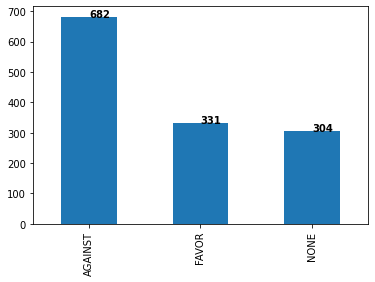

In [11]:
classes = df_train['Stance']
classes.value_counts().plot(kind = 'bar')

for index, value in enumerate([682, 331, 304]):
    plt.text(index, value,
             str(value), fontweight = 'bold')


### Performing EDA on Raw data

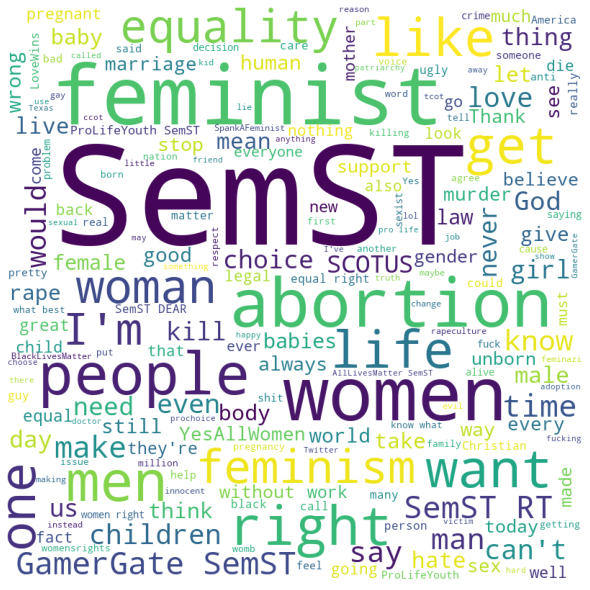

In [12]:
stop_words = set(stopwords.words('english'))

plotWorldCloud(df_train,stop_words,200)

Word clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.

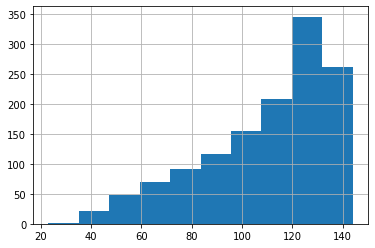

In [13]:
#To check average length of comment length
df_train['Tweet'].str.len().hist()

From the above distribution analysis, we can conclude that the average length of comment follows a **Left-Skewed Normal Distribution**

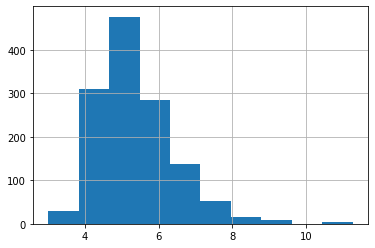

In [14]:
#Plotting average word length in each sentence
df_train['Tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

From the above distribution analysis, we can conclude that the average length of words follows a **Right-Skewed Normal Distribution**

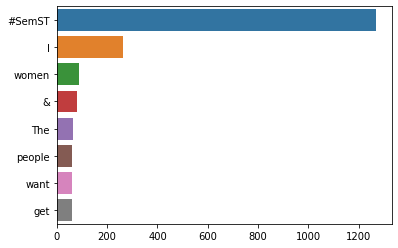

In [15]:
corpus=[]
new= df_train['Tweet'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

stop=set(stopwords.words('english'))

counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

This analysis presents the relative usage of most frequent words in the tweets. As the exact number for each is not of any particular interest for this analysis, it is omitted.

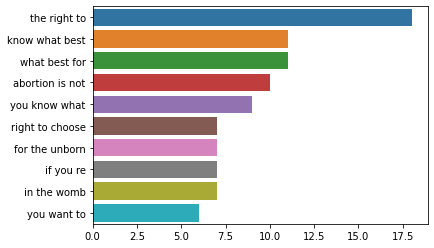

In [16]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


top_n_bigrams=get_top_ngram(df_train['Tweet'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)


n-gram is a contiguous sequence of n items from a given sample of text or speech.

### Cleaning the text dataset

In [17]:
df_train["text"]=df_train["Tweet"].progress_apply(text_preprocessing)

# preprocessed_train = pd.read_csv('train.csv')
# df_train["text"] = preprocessed_train['text']

100%|██████████| 1317/1317 [16:05<00:00,  1.36it/s]


In [18]:
# Sampling the processed data
df_train["text"].iloc[0:10]

0    just lay down the law on abortion in -PRON- bi...
1    @tooprettyclub be -PRON- of with # op male tel...
2    if -PRON- do not want -PRON- kid , put -PRON- ...
3    @redalert -there should be a " stigma " to bot...
4    but be not that the problem then . not enough ...
5    life be -PRON- first and most basic human right .
6    rise & shine -PRON- a new day & -PRON- be aliv...
7    lao -PRON- school think give woman the right t...
8    @asasoltan put abortion in with choice for wom...
9    last meeting of the year tonight ! 7:00 pm in ...
Name: text, dtype: object

#### Encoding Labels

In [19]:
# label_encoder object knows how to understand word labels. As machine learning model only understands numbers,
# the categorial labels are encoded as numbers.
label_encoder = preprocessing.LabelEncoder()
 
classes = label_encoder.fit_transform(classes)
print(classes)


[0 1 0 ... 0 0 0]


### Processing test dataset

In [21]:
df_test["text"]=df_test["Tweet"].progress_apply(text_preprocessing)

# preprocessed_test = pd.read_csv('test_final.csv')
# df_test["text"]=preprocessed_test["text"]



100%|██████████| 562/562 [06:32<00:00,  1.43it/s]


Performing EDA on Cleaned training dataset

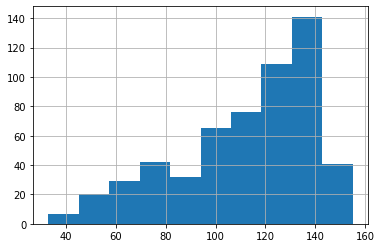

In [22]:
#To check average length of comment length
df_test["text"].str.len().hist()

From the above distribution analysis, we can conclude that the average length of words follows a **Left-Skewed Normal Distribution**

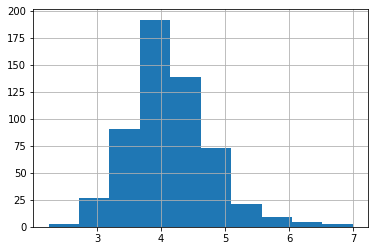

In [23]:
#Plotting average word length in each sentence
df_test["text"].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

From the above distribution analysis, we can conclude that the average length of words approximately follows a **Normal Distribution**

In [24]:
df_test["text"].str.split()

0      [need, a, provide, r.e, ., agent, ?, -, suppor...
1      [where, be, the, childcare, program, @joanburt...
2      [i, get, several, request, with, petition, to,...
3      [-PRON-, must, always, see, other, as, christ,...
4      [prayer, or, baby, urgent, prayer, one, in, le...
                             ...                        
557    [@mairie_williams, be, -PRON-, hero, with, -PR...
558    [rather, be, an, ", ugly, ", feminist, then, b...
559    [iamnovaah, :, t, chrzoc, :, pitch, be, run, w...
560    [@angerelle, -PRON-, disagree, that, people, s...
561    [#, rapeculture, be, basically, a, able, ., -P...
Name: text, Length: 562, dtype: object

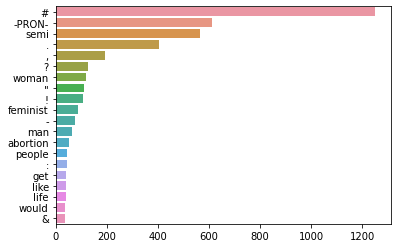

In [25]:
corpus=[]
new= df_test["text"].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

stop=set(stopwords.words('english'))

counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

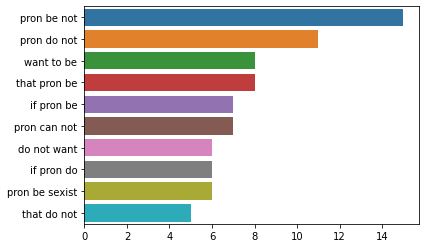

In [26]:
top_n_bigrams=get_top_ngram(df_test["text"],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)


In [27]:
# Function to plot word cloud 

def plotWorldCloud(clean_text,stopwords,maxWords=500):
    comment_words = '' 
    # iterate through the csv file 
    for val in clean_text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = maxWords,
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image					 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

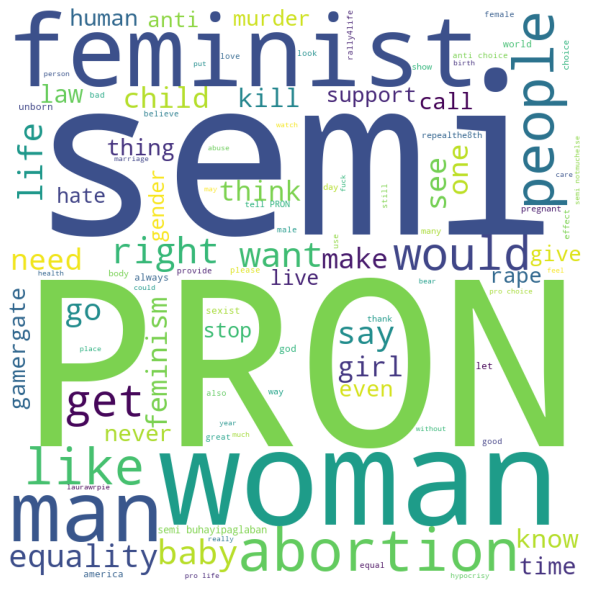

In [28]:
plotWorldCloud(df_test["text"],stop_words,200)

Word clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.

In [30]:
X_train = df_train["text"]
y_train = df_train['Stance']

In [31]:
X_test = df_test["text"]
y_test = df_test['Stance']

In [33]:
possible_labels = y_train.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

y_train = y_train.replace(label_dict)
y_test = y_test.replace(label_dict)

In [34]:
# The code below checks erronous data(data with no labels, etc) and removes them
print(y_test[y_test.isnull() == True])
X_test.drop(index = 23, inplace = True)
y_test.drop(index = 23, inplace = True)
y_test[y_test.isnull() == True]

23   NaN
Name: Stance, dtype: float64


Series([], Name: Stance, dtype: float64)

### Feature Extraction


Converting the textual data to Numerical data through count vectorizer

In [35]:
## CountVec
# vect =CountVectorizer(analyzer='word',token_pattern=r'\w+')
# vect.fit(list(clean_text))
# #X_dtm=vect.fit_transform(X)
# X_train_dtm = vect.transform(X_train)
# X_test_dtm=vect.transform(X_test)


## TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))
vect.fit(list(X_train))
X_train_dtm = vect.transform(X_train)
X_test_dtm=vect.transform(X_test)


'''
It was found that TF-IDF to perform better than CountVec on the given data. 
It is expected as TF-IDF captures the importance of words in a document and helps the model to attend to it properly.
'''

'\nIt was found that TF-IDF to perform better than CountVec on the given data. \nIt is expected as TF-IDF captures the importance of words in a document and helps the model to attend to it properly.\n'

### Applying predictive modeling through SVM classifier, Random Forest and MNB classifier

#### Important functions

In [36]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      # _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                              #  scoring=_scoring,
                               return_train_score=True)
      
      return results

In [37]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()



In [39]:
! pip install yellowbrick

#### SVM classifier

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm



parameters = {'kernel':('linear', 'rbf', 'poly'),'decision_function_shape':('ovo', 'ovr'), 'C':[1, 2, 5, 10, 100]}
svc = svm.SVC()
clf_opt = GridSearchCV(svc, parameters, n_jobs=-1, verbose = 1)
clf_opt.fit(X_train_dtm, y_train)
y_pred = clf_opt.predict(X_test_dtm)
print(classification_report(y_test, y_pred))
clf_opt.get_params(deep=True)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       328
         1.0       0.50      0.48      0.49       125
         2.0       0.53      0.34      0.42       108

    accuracy                           0.62       561
   macro avg       0.57      0.53      0.54       561
weighted avg       0.61      0.62      0.61       561



{'cv': None,
 'error_score': nan,
 'estimator': SVC(),
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': -1,
 'param_grid': {'C': [1, 2, 5, 10, 100],
  'decision_function_shape': ('ovo', 'ovr'),
  'kernel': ('linear', 'rbf', 'poly')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

The optimal parameters found using Coarse Grid Search for SVM are in the dictionary above. 

In [40]:
#applying SVM
#Create a svm Classifier
from sklearn import svm

svc = svm.SVC()

clf = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr', degree=3, gamma='scale') # polynomial Kernel

#Train the model using the training sets
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
# y_test

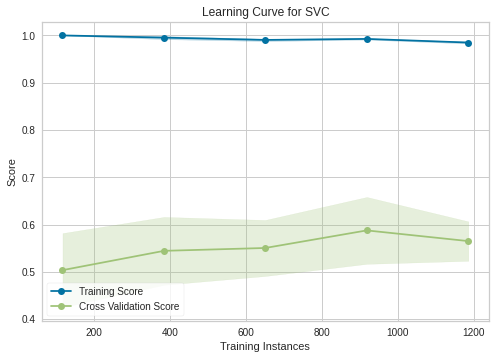

In [41]:
from yellowbrick.model_selection import learning_curve
import warnings
learning_curve(clf, X_train_dtm, y_train, cv=10, scoring='accuracy')
warnings.simplefilter("ignore")

As the validation accuracy is increasing, we can say that our model has not overfitted the data yet. The slight decrease in traning accuracy is due to the regularisation.

In [42]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74       328
         1.0       0.54      0.34      0.42       125
         2.0       0.58      0.14      0.22       108

    accuracy                           0.62       561
   macro avg       0.58      0.45      0.46       561
weighted avg       0.60      0.62      0.57       561



In [41]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, valid_scores = learning_curve(
#     svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr', degree=3, gamma='scale'), X_train_dtm, y_train, train_sizes=[50, 80, 110], cv=5)



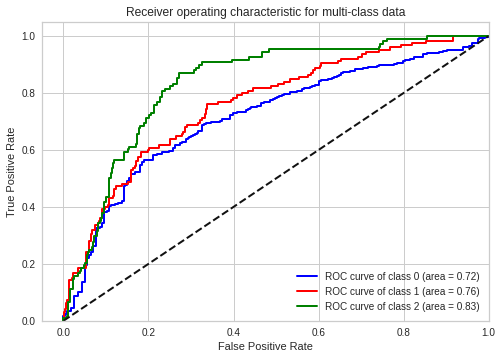

In [43]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y_train_roc = label_binarize(y_train, classes=[0, 1, 2])
y_test_roc = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y_train_roc.shape[1]

classifier = OneVsRestClassifier(svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr', degree=3, gamma='scale'))
y_score = classifier.fit(X_train_dtm, y_train_roc).decision_function(X_test_dtm)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc [:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

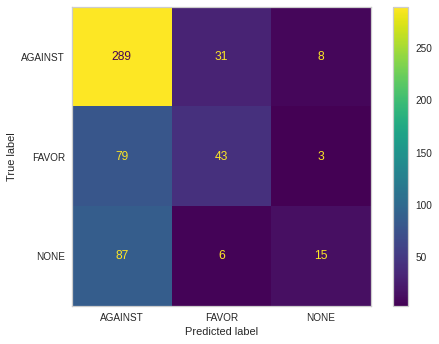

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AGAINST','FAVOR','NONE'])
disp.plot()
plt.grid(False)
plt.show()

{'fit_time': array([1.59213758, 1.57018781, 1.55801797, 1.57291055, 1.5611999 ]), 'score_time': array([0.28580189, 0.28426528, 0.27849746, 0.27081132, 0.27070665]), 'test_score': array([0.54545455, 0.5719697 , 0.54372624, 0.56653992, 0.52851711]), 'train_score': array([0.99050332, 0.98290598, 0.9857685 , 0.98766603, 0.98387097])}


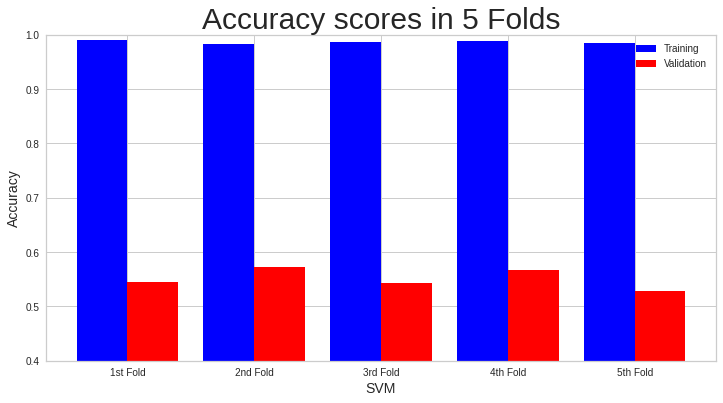

In [45]:
svm_result = cross_validation(clf, X_train_dtm, y_train, 5)
print(svm_result)

plot_result('SVM',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            svm_result['train_score'],
            svm_result['test_score'])

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 

#### MNB classifier

In [48]:
parameters = {'fit_prior':(True, False), 'alpha':[0, 1, 2, 5, 10, 100]}
mnb = MultinomialNB()

mnb_opt = GridSearchCV(mnb, parameters, n_jobs=-1, verbose = 1)
mnb_opt.fit(X_train_dtm, y_train)
y_pred = mnb_opt.predict(X_test_dtm)
print(classification_report(y_test, y_pred))
mnb_opt.get_params(deep=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
              precision    recall  f1-score   support

         0.0       0.63      0.88      0.73       328
         1.0       0.41      0.28      0.33       125
         2.0       0.57      0.11      0.19       108

    accuracy                           0.60       561
   macro avg       0.54      0.42      0.42       561
weighted avg       0.57      0.60      0.54       561



{'cv': None,
 'error_score': nan,
 'estimator': MultinomialNB(),
 'estimator__alpha': 1.0,
 'estimator__class_prior': None,
 'estimator__fit_prior': True,
 'n_jobs': -1,
 'param_grid': {'alpha': [0, 1, 2, 5, 10, 100], 'fit_prior': (True, False)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

The optimal parameters found using Coarse Grid Search for Multilabel Naive Bayes are in the dictionary above.

In [49]:
mnb = MultinomialNB(alpha= 1.0, fit_prior = True)
mnb.fit(X_train_dtm, y_train)
y_pred_MNB = mnb.predict(X_test_dtm)

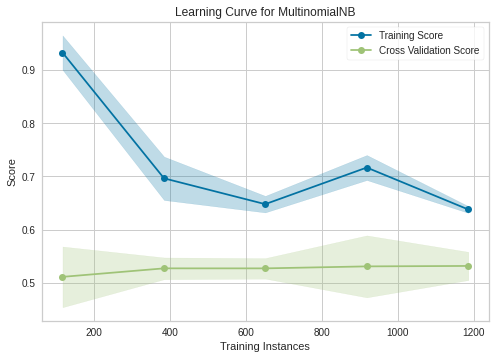

In [43]:
from yellowbrick.model_selection import learning_curve
import warnings
learning_curve(mnb, X_train_dtm, y_train, cv=10, scoring='accuracy')
warnings.simplefilter("ignore")

In [ ]:
print(classification_report(y_test, y_pred_MNB))

              precision    recall  f1-score   support

         0.0       0.59      0.97      0.74       328
         1.0       0.32      0.06      0.10       125
         2.0       1.00      0.04      0.07       108

    accuracy                           0.59       561
   macro avg       0.64      0.35      0.30       561
weighted avg       0.61      0.59      0.47       561



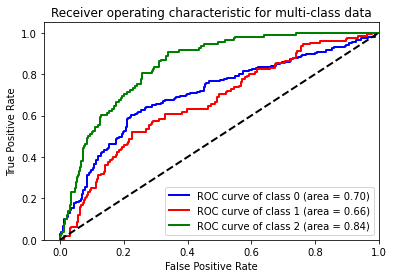

In [ ]:
# Binarize the output
y_train_roc = label_binarize(y_train, classes=[0, 1, 2])
y_test_roc = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y_train_roc.shape[1]

classifier = OneVsRestClassifier(MultinomialNB(alpha= 1.0, fit_prior = True))
y_score = (classifier.fit(X_train_dtm, y_train_roc)).predict_proba(X_test_dtm)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc [:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

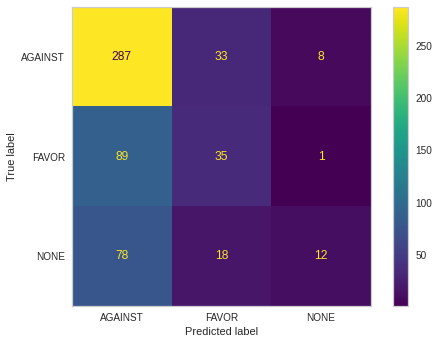

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AGAINST','FAVOR','NONE'])
disp.plot()
plt.grid(False)

plt.show()

{'fit_time': array([0.00817657, 0.0052247 , 0.00497603, 0.00408936, 0.0033915 ]), 'score_time': array([0.00124383, 0.00117373, 0.00115919, 0.00071454, 0.00073123]), 'test_score': array([0.52651515, 0.53787879, 0.50570342, 0.54752852, 0.51330798]), 'train_score': array([0.61823362, 0.61538462, 0.63282732, 0.62998102, 0.64800759])}


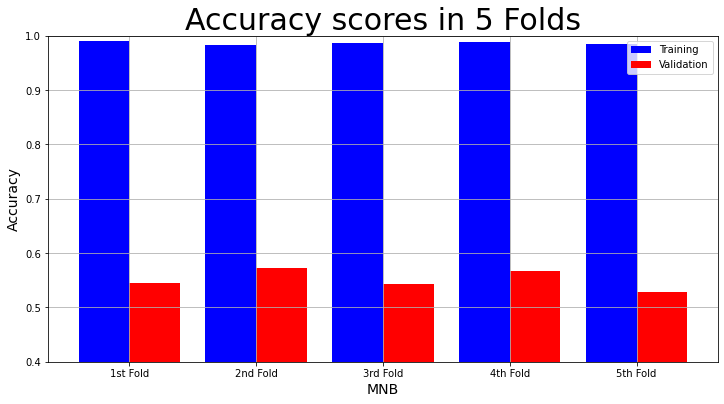

In [ ]:
MNB_result = cross_validation(mnb, X_train_dtm, y_train, 5)
print(MNB_result)

plot_result('MNB',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            svm_result['train_score'],
            svm_result['test_score'])

#### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
parameters = {'n_estimators': [1, 2, 5, 10, 100], 'criterion':('gini', 'entropy'), "max_features" : ('auto', 'sqrt', 'log2'), 'class_weight':('balanced', 'balanced_subsample')}
rf = RandomForestClassifier()

rf_opt = GridSearchCV(rf, parameters, n_jobs=-1, verbose = 1)
rf_opt.fit(X_train_dtm, y_train)
y_pred = rf_opt.predict(X_test_dtm)
print(classification_report(y_test, y_pred))
rf_opt.get_params(deep=True)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70       328
         1.0       0.46      0.47      0.46       125
         2.0       0.52      0.71      0.60       108

    accuracy                           0.62       561
   macro avg       0.58      0.61      0.59       561
weighted avg       0.64      0.62      0.63       561



{'cv': None,
 'error_score': nan,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': -1,
 'param_grid': {'class_weight': ('balanced', 'balanced_subsample'),
  'criterion': ('gini', 'entropy'),
  'max_features': ('auto', 'sqrt', 'log2'),
  'n_estimators': [1, 2, 5, 10, 100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

The optimal parameters found using Coarse Grid Search for Random Forest are in the dictionary above.

In [77]:
rf = RandomForestClassifier(criterion = 'gini', max_features= 'auto', n_estimators= 100)
rf.fit(X_train_dtm, y_train)
pred_rf = rf.predict(X_test_dtm)

print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       328
         1.0       0.43      0.38      0.41       125
         2.0       0.53      0.64      0.58       108

    accuracy                           0.61       561
   macro avg       0.55      0.57      0.56       561
weighted avg       0.61      0.61      0.61       561



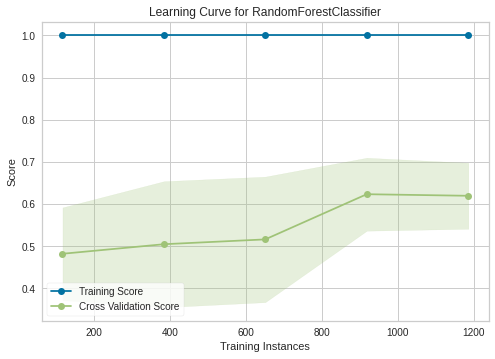

In [53]:
from yellowbrick.model_selection import learning_curve
import warnings
learning_curve(rf, X_train_dtm, y_train, cv=10, scoring='accuracy')
warnings.simplefilter("ignore")

Validation accuracy is increasing.

In [ ]:
pred_rf = rf.predict(X_test_dtm)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       328
         1.0       0.39      0.34      0.37       125
         2.0       0.52      0.65      0.58       108

    accuracy                           0.60       561
   macro avg       0.54      0.56      0.55       561
weighted avg       0.60      0.60      0.60       561



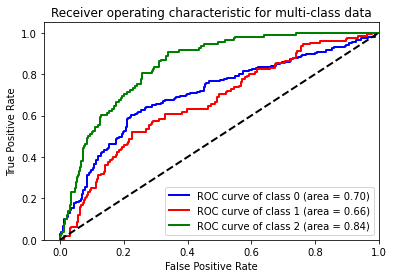

In [ ]:
# Binarize the output
y_train_roc = label_binarize(y_train, classes=[0, 1, 2])
y_test_roc = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y_train_roc.shape[1]

classifier = OneVsRestClassifier(MultinomialNB(alpha= 1.0, fit_prior = True))
y_score = (classifier.fit(X_train_dtm, y_train_roc)).predict_proba(X_test_dtm)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc [:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

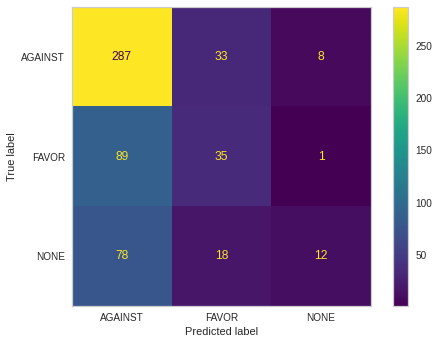

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AGAINST','FAVOR','NONE'])
disp.plot()
plt.grid(False)

plt.show()

{'fit_time': array([0.74548459, 0.70226884, 0.68189669, 0.69366241, 0.69834542]), 'score_time': array([0.02489734, 0.02701306, 0.0256741 , 0.02429795, 0.02492404]), 'test_score': array([0.68181818, 0.60984848, 0.56653992, 0.60076046, 0.61596958]), 'train_score': array([1., 1., 1., 1., 1.])}


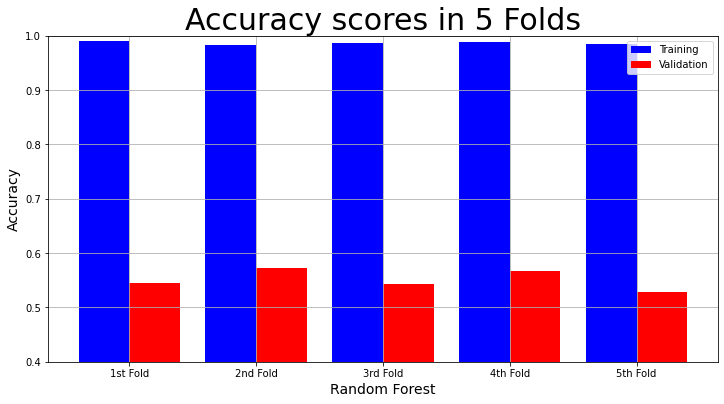

In [ ]:
rf_result = cross_validation(rf, X_train_dtm, y_train, 5)
print(rf_result)

plot_result('Random Forest',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            svm_result['train_score'],
            svm_result['test_score'])

### Applying deep-Learning Classification models - Roberta, Bert and LSTM

In [54]:
! pip install wandb

In [55]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Apr 24 16:04:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [56]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 13.6 gigabytes of available RAM



In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import timeit
import warnings

from simpletransformers.classification import (
    MultiLabelClassificationModel, MultiLabelClassificationArgs
)
pd.set_option('display.max_columns', None)
warnings.simplefilter(action="ignore")

In [58]:
X_train, y_train
train = pd.DataFrame()
train['text'] = X_train
train['label']= y_train

test =  pd.DataFrame()
test['text'] = X_test
test['label'] = y_test

bridge_types = ('a', 'b', 'c')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])# generate binary values using get_dummies

trainRB = pd.DataFrame()
trainRB['text'] = X_train
dum_df = pd.get_dummies(y_train, columns=["Bridge_Types"])
trainRB['label'] = list(zip(dum_df[0.0].tolist(), dum_df[1.0].tolist(), dum_df[2.0].tolist()))


testRB =  pd.DataFrame()
testRB['text'] = X_test
dum_df = pd.get_dummies(y_test, columns=["Bridge_Types"])

dum_df.columns

testRB['label']  = list(zip(dum_df[0.0].tolist(), dum_df[1.0].tolist(), dum_df[2.0].tolist()))



#### **Roberta**

In [53]:
from simpletransformers.classification import MultiLabelClassificationModel

In [59]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def f1_multiclass(labels, preds):
      return f1_score(labels, preds, average='micro')


In [79]:
## Grid Search

parameters =  [0.1, .01, .001, .0001, .00001]

optim_params = {'f1': 0, 'lr':0}
for lr in parameters:
  model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=3, args={'train_batch_size':16, 'gradient_accumulation_steps':16, 'learning_rate': lr, 'num_train_epochs': 3, 'max_seq_length': 512, 'overwrite_output_dir': True})
  model.train_model(trainRB)
  result, model_outputs, wrong_predictions = model.eval_model(testRB)
  score = f1_score(y_test, np.argmax(model_outputs, axis = 1), average='weighted')

  print("lr: ", lr, " f1 score: ", score)
  print("______________________________________________________________")

  if score > optim_params['f1']:
    optim_params['f1'] = score
    optim_params['lr'] = lr
    
  gc.collect()
  torch.cuda.empty_cache()
  del model
optim_params

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'c

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.1  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'c

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.01  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'c

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.001  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'c

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.0001  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'c

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  1e-05  f1 score:  0.4314327019283018
______________________________________________________________


{'f1': 0.4314327019283018, 'lr': 0.1}

The grid search analysis for RoBERTa were not very useful as the f1 score stayed constant with changing learning rates. Hence, the Label Ranking average precision (LRAP) measures the average precision of the predictive model but instead using precision-recall.

# ****This will prompt you to paste an API key. Please paste ea593f921a7891b5737bd4d7fc22d9bd3b0a0d31 there.****


This will log you into my wandb experiment dashboard which is essential to access the history of models trained using SimpleTransformers.

In [60]:
import wandb
! wandb login


wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [61]:
model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=3, args={'train_batch_size':16, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512, 'overwrite_output_dir': True, 'wandb_project': "roberta", 'evaluate_during_training': True})
model.train_model(trainRB, eval_df=trainRB)


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias',

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: berttaketwo (use `wandb login --relogin` to force relogin)


Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

(249,
 defaultdict(list,
             {'LRAP': [0.8080232852442427,
               0.8711718552265252,
               0.9062262718299168],
              'eval_loss': [0.47832542088898744,
               0.36953694982962176,
               0.28591513873049706],
              'global_step': [83, 166, 249],
              'train_loss': [0.8943281173706055,
               0.7932648062705994,
               0.3778282403945923]}))

In [78]:
# 'wandb_project': "roberta", 'evaluate_during_training': True}
#  eval_df=trainRB)

api = wandb.Api()
# team, project, run_id = "wandb", "yolo-chess", "33fp7u8d"
run = api.run('berttaketwo/roberta/3irc6b6o')

run.display(height=1080)

True

As can be seen from the above graphs, training loss and validation loss is decreasing. Hence, the model is not overfitting yet.

In [ ]:
# del model
# gc.collect()
# torch.cuda.empty_cache()

In [62]:
test['label'] = test['label'].astype(int)
result, model_outputs, wrong_predictions = model.eval_model(testRB)

print(classification_report(y_test, np.argmax(model_outputs, axis = 1)))



  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71       328
         1.0       0.43      0.57      0.49       125
         2.0       0.63      0.69      0.65       108

    accuracy                           0.64       561
   macro avg       0.61      0.63      0.62       561
weighted avg       0.67      0.64      0.65       561



[[0.68701172 0.12658691 0.12768555]
 [0.70068359 0.21130371 0.03671265]
 [0.85839844 0.16821289 0.02224731]
 ...
 [0.66015625 0.32519531 0.03010559]
 [0.32958984 0.56054688 0.08599854]
 [0.30444336 0.734375   0.04037476]]


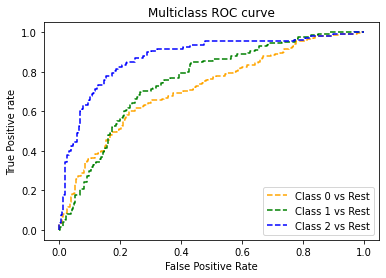

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print(model_outputs)
from scipy.special import softmax
prob = softmax(model_outputs, axis=1)
prob

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

# b[pred['preds'][0].cpu().numpy() == 0]

for i in range(n_class):  
    fpr[i], tpr[i], thresh[i] = roc_curve(test['label'], prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

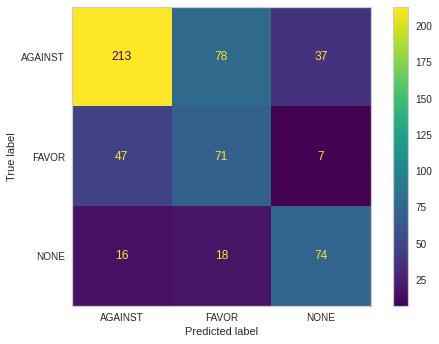

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['label'], np.argmax(model_outputs, axis = 1), labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AGAINST','FAVOR','NONE'])
disp.plot()
plt.grid(False)

plt.show()

In [ ]:
del model
gc.collect()
torch.cuda.empty_cache()


In [ ]:
from sklearn.model_selection import KFold

trainRB.reset_index(drop =True,inplace=True)
kf = KFold(n_splits=5)
kf.get_n_splits(trainRB['text'])

print(kf)
fold_no = 1
train_acc_fold = []
val_acc_fold = []

for train_index, test_index in kf.split(trainRB['text']):

  train_rb = trainRB.iloc[train_index]
  test_rb = trainRB.iloc[test_index]
  train_label = train.iloc[train_index].label
  test_label = train.iloc[test_index].label

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=3, 
                                        args={'train_batch_size':16, 
                                              'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512, 
                                              'overwrite_output_dir': True, 'evaluate_during_training':True})
  model.train_model(train_rb, eval_df = test_rb)
  result, model_outputs, wrong_predictions = model.eval_model(train_rb)
  train_acc = np.sum(train_label == np.argmax(model_outputs, axis = 1))/len(train_label)
  train_acc_fold.append(train_acc)

  result, model_outputs, wrong_predictions = model.eval_model(test_rb)
  val_acc = np.sum(test_label == np.argmax(model_outputs, axis = 1))/len(test_label)
  val_acc_fold.append(val_acc)


  gc.collect()
  torch.cuda.empty_cache()
  del model

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(train_acc_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {train_acc_fold[i]}%')
for i in range(0, len(val_acc_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {val_acc_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Train Accuracy: {np.mean(train_acc_fold)} (+- {np.std(train_acc_fold)})')
print('------------------------------------------------------------------------')
print(f'> Val. Accuracy: {np.mean(val_acc_fold)} (+- {np.std(val_acc_fold)})')
print('------------------------------------------------------------------------')


KFold(n_splits=5, random_state=None, shuffle=False)
------------------------------------------------------------------------
Training for fold 1 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1053 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 2 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1053 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 3 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 4 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 5 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.7977207977207977%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.792022792022792%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.777988614800759%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 0.7685009487666035%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 0.8510436432637571%
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.5984848484848485%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.6666666666666666%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.6083650190114068%
--

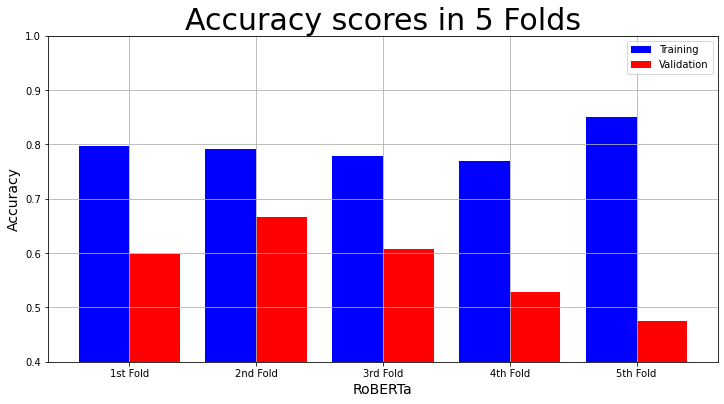

In [ ]:
plot_result('RoBERTa',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            train_acc_fold,
            val_acc_fold)


#### **BERT**

In [64]:
from simpletransformers.classification import MultiLabelClassificationModel

In [65]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def f1_multiclass(labels, preds):
      return f1_score(labels, preds, average='micro')


In [ ]:
## Grid Search

# gradients exploded for lr = 0.1
parameters =  [.01, .001, .0001, .00001]

optim_params = {'f1': 0, 'lr':0}
for lr in parameters:
  model = MultiLabelClassificationModel('bert', 'bert-base-uncased', num_labels=3, args={'train_batch_size':16, 'learning_rate': lr, 'num_train_epochs': 3, 'max_seq_length': 512, 'overwrite_output_dir': True})
  model.train_model(trainRB)
  result, model_outputs, wrong_predictions = model.eval_model(testRB)
  score = f1_score(y_test, np.argmax(model_outputs, axis = 1), average='weighted')

  print("lr: ", lr, " f1 score: ", score)
  print("______________________________________________________________")

  if score > optim_params['f1']:
    optim_params['f1'] = score
    optim_params['lr'] = lr

  del model
  gc.collect()
  torch.cuda.empty_cache()

print("Optimal learning rate:")
print(optim_params)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.01  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.001  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  0.0001  f1 score:  0.4314327019283018
______________________________________________________________


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

lr:  1e-05  f1 score:  0.5197478873473235
______________________________________________________________
Optimal learning rate:
{'f1': 0.5197478873473235, 'lr': 1e-05}


As found from the grid search above, the optimal learning rate for BERT was in the order 0.00001.

In [66]:
model = MultiLabelClassificationModel('bert', 'bert-base-uncased', num_labels=3, args={'train_batch_size':16, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512, 'overwrite_output_dir': True, 'wandb_project': "bert", 'evaluate_during_training': True})
model.train_model(trainRB,  eval_df=trainRB)
# 'wandb_project': "bert", 'evaluate_during_training': True}
#  eval_df=trainRB)



Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

(249,
 defaultdict(list,
             {'LRAP': [0.7410782080485968,
               0.8686408504176162,
               0.8936977980258166],
              'eval_loss': [0.5702788526361638,
               0.4070775750008496,
               0.34135573623758375],
              'global_step': [83, 166, 249],
              'train_loss': [0.5016305446624756,
               0.46097999811172485,
               0.22317703068256378]}))

In [84]:
api = wandb.Api()
# team, project, run_id = "wandb", "yolo-chess", "33fp7u8d"
run = api.run('berttaketwo/bert/287m6qw3')

run.display(height=1080)

True

As can be seen from the above graphs, training loss and validation loss is decreasing. Hence, the model is not overfitting yet.

In [ ]:
test['label'] = test['label'].astype(int)
result, model_outputs, wrong_predictions = model.eval_model(testRB)

print(classification_report(y_test, np.argmax(model_outputs, axis = 1)))



  0%|          | 0/561 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         0.0       0.75      0.63      0.69       328
         1.0       0.40      0.53      0.46       125
         2.0       0.60      0.69      0.64       108

    accuracy                           0.62       561
   macro avg       0.59      0.62      0.60       561
weighted avg       0.65      0.62      0.63       561



In [ ]:
result, model_outputs

({'LRAP': 0.7944147355912056, 'eval_loss': 0.49397070537990245},
 array([[0.83740234, 0.05697632, 0.17260742],
        [0.32739258, 0.07904053, 0.66455078],
        [0.85205078, 0.17980957, 0.02859497],
        ...,
        [0.87451172, 0.07977295, 0.08880615],
        [0.21435547, 0.36621094, 0.33691406],
        [0.35131836, 0.58935547, 0.04394531]]))

[[0.83740234 0.05697632 0.17260742]
 [0.32739258 0.07904053 0.66455078]
 [0.85205078 0.17980957 0.02859497]
 ...
 [0.87451172 0.07977295 0.08880615]
 [0.21435547 0.36621094 0.33691406]
 [0.35131836 0.58935547 0.04394531]]


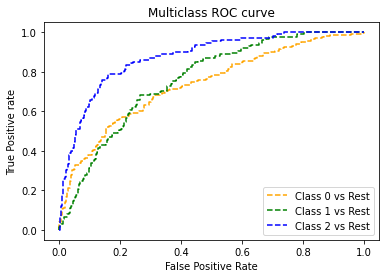

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print(model_outputs)
from scipy.special import softmax
prob = softmax(model_outputs, axis=1)
prob

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3


# print(pred_prob, '\n --------------------------------------')
for i in range(n_class):  
    fpr[i], tpr[i], thresh[i] = roc_curve(test['label'], prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


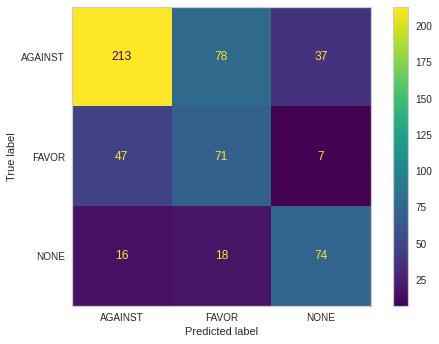

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['label'], np.argmax(model_outputs, axis = 1), labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AGAINST','FAVOR','NONE'])
disp.plot()
plt.grid(False)

plt.show()

In [85]:
del model
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(trainRB['text'])

print(kf)
fold_no = 1
train_acc_fold = []
val_acc_fold = []

for train_index, test_index in kf.split(trainRB['text']):

  train_rb = trainRB.iloc[train_index]
  test_rb = trainRB.iloc[test_index]
  train_label = train.iloc[train_index].label
  test_label = train.iloc[test_index].label

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=3, 
                                        args={'train_batch_size':16, 
                                              'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512, 
                                              'overwrite_output_dir': True, 'evaluate_during_training':True})
  model.train_model(train_rb, eval_df = test_rb)
  result, model_outputs, wrong_predictions = model.eval_model(train_rb)
  train_acc = np.sum(train_label == np.argmax(model_outputs, axis = 1))/len(train_label)
  train_acc_fold.append(train_acc)

  result, model_outputs, wrong_predictions = model.eval_model(test_rb)
  val_acc = np.sum(test_label == np.argmax(model_outputs, axis = 1))/len(test_label)
  val_acc_fold.append(val_acc)

  gc.collect()
  torch.cuda.empty_cache()
  del model

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(train_acc_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {train_acc_fold[i]}%')
for i in range(0, len(val_acc_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {val_acc_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Train Accuracy: {np.mean(train_acc_fold)} (+- {np.std(train_acc_fold)})')
print('------------------------------------------------------------------------')
print(f'> Val. Accuracy: {np.mean(val_acc_fold)} (+- {np.std(val_acc_fold)})')
print('------------------------------------------------------------------------')


KFold(n_splits=5, random_state=None, shuffle=False)
------------------------------------------------------------------------
Training for fold 1 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1053 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 2 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1053 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 3 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 4 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Training for fold 5 ...


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 

  0%|          | 0/1054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/33 [00:00<?, ?it/s]

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.7720797720797721%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.7502374169040835%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.7628083491461101%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 0.8481973434535104%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 0.8301707779886148%
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.6098484848484849%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.6818181818181818%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.6501901140684411%


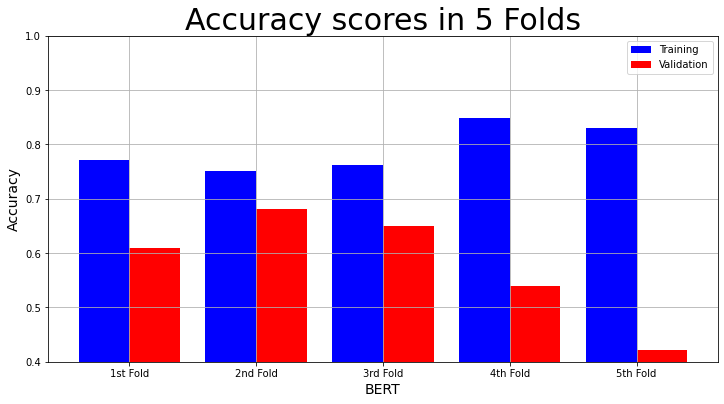

In [ ]:
plot_result('BERT',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            train_acc_fold,
            val_acc_fold)


#### **LSTM**

In [68]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


In [69]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train.text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 4204 unique tokens.


In [70]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(train.text.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1317, 250)


In [71]:
Y = pd.get_dummies(train.label).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1317, 3)


In [72]:
from keras.models import Sequential
from tensorflow import keras

from keras.layers import Embedding,Dense,LSTM,SpatialDropout1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

optimizer = keras.optimizers.Adam(lr= 0.01)

lstm_model = Sequential()
lstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 64
lstm_model.save_weights('f.h5')

In [73]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
## Grid Search

parameters =  [0.1, .01, .001, .0001, .00001]

optim_params = {'f1': 0, 'lr':0}
for lr in parameters:
  optimizer = keras.optimizers.Adam(lr=lr)

  lstm_model.load_weights('f.h5') 

  lstm_model.compile(optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

  history = lstm_model.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


  score = history.history['val_accuracy'][-1]
  print("lr: ", lr, " score: ", score)

  if score > optim_params['f1']:
    optim_params['f1'] = score
    optim_params['lr'] = lr
optim_params

Epoch 1/10
19/19 [==============================] - 26s 1s/step - loss: 1.5942 - accuracy: 0.3747 - val_loss: 1.1749 - val_accuracy: 0.0985
Epoch 2/10
19/19 [==============================] - 19s 1s/step - loss: 1.0629 - accuracy: 0.4970 - val_loss: 0.7523 - val_accuracy: 0.7879
Epoch 3/10
19/19 [==============================] - 19s 1s/step - loss: 0.8574 - accuracy: 0.6363 - val_loss: 1.0807 - val_accuracy: 0.5682
Epoch 4/10
19/19 [==============================] - 20s 1s/step - loss: 0.7060 - accuracy: 0.7173 - val_loss: 0.8426 - val_accuracy: 0.6364
Epoch 5/10
19/19 [==============================] - 20s 1s/step - loss: 0.6576 - accuracy: 0.7257 - val_loss: 1.1449 - val_accuracy: 0.5530
lr:  0.1  score:  0.5530303120613098
Epoch 1/10
19/19 [==============================] - 23s 1s/step - loss: 1.0290 - accuracy: 0.4819 - val_loss: 0.7311 - val_accuracy: 0.8409
Epoch 2/10
19/19 [==============================] - 21s 1s/step - loss: 0.5423 - accuracy: 0.8228 - val_loss: 1.3616 - val_

{'f1': 0.8636363744735718, 'lr': 0.0001}

As found from the above grid search, the optimal learning rate is of the order 0.0001

In [74]:

lstm_model.load_weights('f.h5') 

optimizer = keras.optimizers.Adam(lr=0.0003)

# lstm_model.compile(optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
lstm_model.compile(optimizer, loss='categorical_crossentropy',metrics=['accuracy'])


history = lstm_model.fit(X, Y, epochs=15, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

seq = tokenizer.texts_to_sequences(test.text.values)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = np.argmax(lstm_model.predict(padded), axis=-1)
test_df=test.replace({'label' : { 'AGAINST' : 0, 'FAVOR' : 1, 'NONE' : 2 }})
print(classification_report(test_df.label.tolist(), pred))

Epoch 1/15
19/19 [==============================] - 37s 2s/step - loss: 1.0868 - accuracy: 0.4591 - val_loss: 0.9830 - val_accuracy: 0.8636
Epoch 2/15
19/19 [==============================] - 29s 2s/step - loss: 1.0564 - accuracy: 0.4793 - val_loss: 0.8434 - val_accuracy: 0.8636
Epoch 3/15
19/19 [==============================] - 30s 2s/step - loss: 1.0419 - accuracy: 0.4793 - val_loss: 0.8098 - val_accuracy: 0.8636
Epoch 4/15
19/19 [==============================] - 29s 2s/step - loss: 1.0272 - accuracy: 0.4793 - val_loss: 0.7995 - val_accuracy: 0.8636
Epoch 5/15
19/19 [==============================] - 30s 2s/step - loss: 1.0018 - accuracy: 0.4793 - val_loss: 0.7586 - val_accuracy: 0.8636
Epoch 6/15
19/19 [==============================] - 29s 2s/step - loss: 0.9420 - accuracy: 0.4996 - val_loss: 0.6577 - val_accuracy: 0.8636
Epoch 7/15
19/19 [==============================] - 29s 2s/step - loss: 0.8381 - accuracy: 0.5544 - val_loss: 0.6811 - val_accuracy: 0.8030
Epoch 8/15
19/19 [==

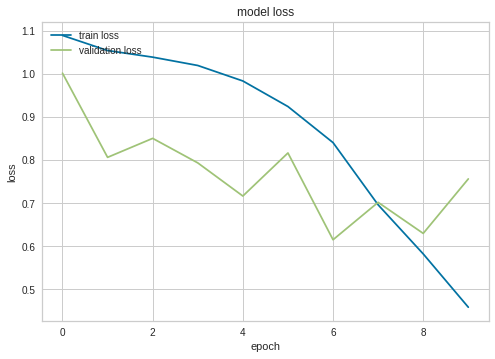

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

As can be seen from the above graphs, training loss and validation loss is decreasing. Hence, the model is not overfitting yet.

[[0.52539062 0.45751953 0.44458008]
 [0.53076172 0.45214844 0.43603516]
 [0.53125    0.45239258 0.43457031]
 ...
 [0.53271484 0.44433594 0.42871094]
 [0.52978516 0.45288086 0.43261719]
 [0.53271484 0.44970703 0.42382812]]


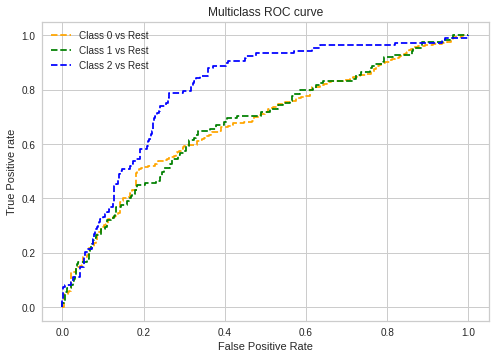

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print(model_outputs)
from scipy.special import softmax
prob = softmax(lstm_model.predict(padded), axis = 1)
prob

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):  
    fpr[i], tpr[i], thresh[i] = roc_curve(test_df.label.tolist(), prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


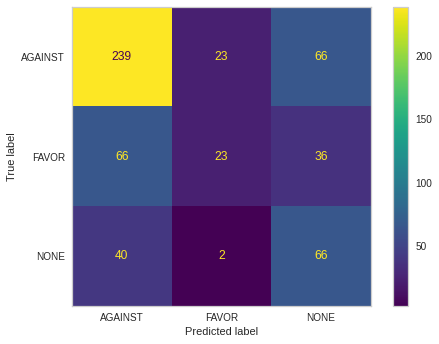

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_df.label.tolist(), pred, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['AGAINST','FAVOR','NONE'])

disp.plot()
plt.grid(False)

plt.show()


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np


# Model configuration
batch_size = 64
no_epochs = 5
optimizer = Adam(lr=0.001)
verbosity = 1
num_folds = 5


# Define per-fold score containers
train_acc = []
acc_per_fold = []
loss_per_fold = []

inputs = X
targets = Y

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  lstm_model.load_weights('f.h5') 
  # Compile the model
  lstm_model.compile(optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = lstm_model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = lstm_model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {lstm_model.metrics_names[0]} of {scores[0]}; {lstm_model.metrics_names[1]} of {scores[1]*100}%')
  train_score = lstm_model.evaluate(inputs[train], targets[train], verbose=0)
  train_acc.append(train_score[1] * 100)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
17/17 [==============================] - 20s 1s/step - loss: 1.0558 - accuracy: 0.5090
Epoch 2/5
17/17 [==============================] - 17s 1s/step - loss: 1.0093 - accuracy: 0.5166
Epoch 3/5
17/17 [==============================] - 17s 1s/step - loss: 0.9182 - accuracy: 0.5299
Epoch 4/5
17/17 [==============================] - 17s 1s/step - loss: 0.7439 - accuracy: 0.6866
Epoch 5/5
17/17 [==============================] - 17s 1s/step - loss: 0.5705 - accuracy: 0.8538
Score for fold 1: loss of 0.9426088333129883; accuracy of 55.30303120613098%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
17/17 [==============================] - 21s 1s/step - loss: 1.0900 - accuracy: 0.4824
Epoch 2/5
17/17 [==============================] - 17s 1s/step - loss: 1.0546 - accuracy: 0.5090
Epoch 3/5
17/17 [==============================] -

In [ ]:
train_acc_per_fold = []
for number in train_acc:
    train_acc_per_fold.append(number / 100)

val_acc_per_fold = []
for number in acc_per_fold:
    val_acc_per_fold.append(number / 100)

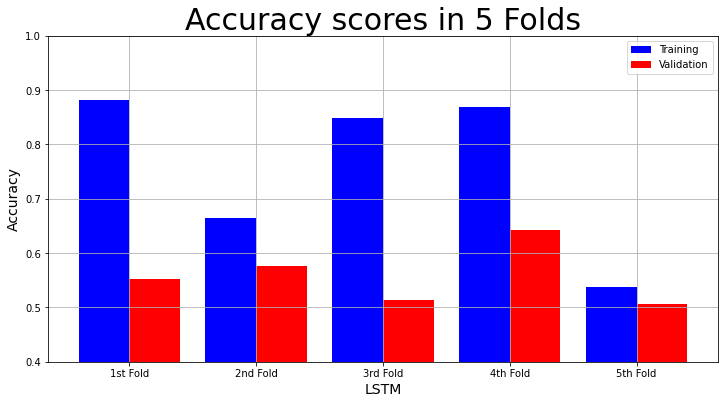

In [ ]:
plot_result('LSTM',
            "Accuracy",
            "Accuracy scores in 5 Folds",
            train_acc_per_fold,
            val_acc_per_fold)

## ***Analysis of performance***

<table>
    <tr>
        <td>...</td>
        <td>F1 Score(Test)</td>
        <td>5-fold CV Train Acc</td>
        <td>5-fold CV Val Acc</td>
    </tr>
    <tr>
        <td>Support Vector Machines</td>
                  <td><font color="red">  
0.6200   <br>
        <td>0.8614</td>
        <td>0.5512</td>
    </tr>
    <tr>
        <td>Naïve Bayes</td>
        <td>0.5900</td>
        <td>0.6288</td>
        <td>0.5261</td>
    </tr>
    <tr>
        <td>Random Forests</td>
        <td>0.6000</td>
        <td>1.0000</td>
        <td><font color="blue">  
0.6149   <br>  
</font>  </td>
    </tr>
    <tr>
        <td>RoBERTa</td>
                <td><font color="blue">  
0.6300   <br>
        <td>0.7974</td>
        <td>0.5754</td>
    </tr>
    <tr>
        <td>BERT</td>
                <td><font color="red">  
0.6200   <br>
        <td>0.7926</td>
                <td><font color="red">  
0.5807   <br> 
    </tr>
    <tr>
        <td>LSTM</td>
        <td>0.5700</td>
        <td>0.7600</td>
        <td>0.5580</td>
    </tr>
</table>

As the data is unbalanced, the main performance metric is f1 score. 

According to it, RoBERTa performs the best. 

On the 5-fold Cross Validation Accuracy, Random forest performs the best.

As evident from the confusion matrices, due to the unbalanced dataset, the models are biased towards the against stance.